# BE/Bi 103, Fall 2016: Homework 1
## Due 1pm, Sunday, October 2

(c) 2016 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This homework was generated from an Jupyter notebook.  You can download the notebook [here](hw1.ipynb).*

### Problem 1.1 (Your goals, 20 pts)

Write down your goals for the class.  Is there something that has been confusing for you that you would like cleared up?  Are there specific techniques you would like to learn?

Each member of your group should write his or her own response (and identify who each response belongs to), but the responses should be turned in together.

<br />
<br />

### Problem 1.2 (Making a Python function and plotting it, 30 pts)

We will soon be doing regression analysis.  We will have a set of $(x,y)$ data and a model that we think describes the observed trends in the data.  For example, we may think that $y$ depends linearly on $x$, so we would propose

\begin{align}
y(x) = a x + b,
\end{align}

where $a$ and $b$ are parameters.  

In order to do the regression, we will need to write a Python function of the form `f(p, x)`, where `p` is a NumPy array containing the fit parameters.  For example, if we wanted to make a linear function, we might define the following.

In [3]:
def lin_func(p, x):
    """
    Returns `p`[0] * `x` + `p`[1].
    """
    a, b = p
    return a * x + b

One of the tricks is that your function should work if `x` is a single number or a NumPy array.  In the above example, it does, as we can see by plotting.

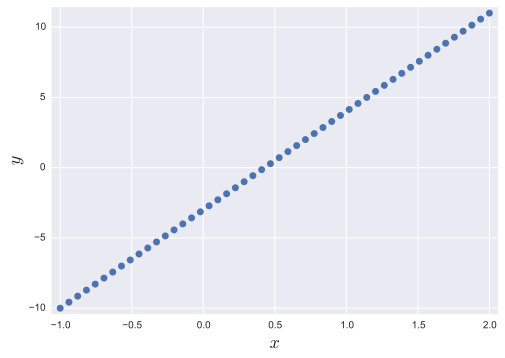

In [6]:
# Make a set of evenly spaced points in x
x = np.linspace(-1.0, 2.0, 50)

# Compute y
y = lin_func(np.array([7.0, -3.0]), x)

# Plot as dots to verify it was calculated for each value of x
plt.plot(x, y, 'o')
plt.margins(x=0.02, y=0.02)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Write Python functions of this form (`f(p, x)`) for the following functions and make smooth plots of them for a few sets of parameter values over appropriate ranges of $x$ values.  If you think it is appropriate, plot the functions on a logarithmic or semilogarithmic scale.  (Check out functions like `plt.loglog` and `plt.semilogy` for this sort of thing.)  Whatever you choose, give an explanation as to why you chose to plot the function the way you did.

**a)** Exponential decay + background signal:

\begin{align}
y = a + b\,\mathrm{e}^{-x/\lambda}
\end{align}

**b)** The Cauchy distribution:

\begin{align}
y = \frac{\beta}{\pi\left(\beta^2 + (x - \alpha)^2\right)}
\end{align}

**c)** The Hill function:

\begin{align}
y = \frac{x^\alpha}{k^\alpha + x^\alpha}.
\end{align}

<br />
<br />

### Problem 1.3 (Microtubule catastrophes I, 50 pts)

Throughout the class, we will analyze data from several sources.  We will look at some data sets repeatedly because there is plenty of interesting data analysis to be done.  One of these data sets comes from [this paper](../protected/papers/gardner_2011.pdf) by Gardner, Zanic, and coworkers.  The full reference is:
Gardner, Zanic, et al., Depolymerizing kinesins Kip3 and MCAK shape cellular microtubule architecture by differential control of catastrophe, *Cell*, **147**, 1092-1103, 2011, [10.1016/j.cell.2011.10.037](http://dx.doi.org/10.1016/j.cell.2011.10.037).

We will discuss the paper more throughout the class, and I encourage you to read it.  Briefly, the authors investigated the dynamics of microtubule catastrophe, the switching of a microtubule from a growing to a shrinking state.  In particular, they were interested in the time between the start of growth of a microtubule and the catastrophe event.  They monitored microtubules by using tubulin (the monomer that comprises a microtubule) that was labeled with a fluorescent marker.  As a control to make sure that fluorescent labels and exposure to laser light did not affect the microtubule dynamics, they performed a similar experiment using differential interference contrast (DIC) microscopy.  They measured the time until catastrophe with labeled and unlabeled tubulin.

In this problem, we will look at the data used to generate Fig. 2a of their paper.  In the end, we will generate a plot similar to Fig. 2a.

**a)** If you haven't already, download the data file [here](../protected/data/gardner_et_al_2011_time_to_catastrophe_dic.csv).  Read the data from the data file into a `DataFrame`.

**b)** I would argue that these data are not tidy.  Why?  It is possible to tidy these data without the fancy techniques we will learn next week.  Tidy the data.  *Hint*: The `dropna()` method of `DataFrame`s may come in handy.

**c)** Plot histograms of the catastrophe times for the experiments with labeled and unlabeled tubulin.  Try different settings of the plotting parameters to see what works best.  In particular, you might want to experiment with the `bins`, `normed`, and `histtype` keyword arguments.  You can show a few candidates for how you would display the data.  For your "official" histogram(s), discuss the design decisions you made to plot it the way you did.

**d)** Plot empirical cumulative histograms as in Fig. 2a of the Gardner, Zanic, et al. paper.  You do not need to plot the inset of that figure. Since you will do this over and over again in exploratory data analysis, write a function with the call signature `ecdf(data)`, which takes a one-dimensional Numpy array of data and returns the `x` and `y` values for plotting the ECDF. As a reminder, of the data set is sorted such that $x_i \le x_{i+1}$, with $i = 1, 2, \ldots, n$, then the y-values for the ECDF, $\hat{F}(x_i)$. are

\begin{align}
\hat{F}(x_i) = \frac{i}{n}.
\end{align}

Use this `ecdf()` function that you wrote to plot the ECDFs shown in Fig. 2a of the Gardner, Zanic, et al. paper.

**e)** Discuss the relative merits of the ways of showing the data in part (d) versus part (e). (If you do part (f), include that in the discussion as well.)

**f)** [10 points extra credit] While many researchers plot ECDFs as in the Garnder, Zanic, et al. paper, this is not the typical convention. More formally, an ECDF, $\hat{F}(x)$, of a data set $X$ consisting of $n$ points indexed from $1$ to $n$ is defined as (see Wasserman, *All of Nonparametric Statistics*, eq. 2.2)

\begin{align}
\hat{F}(x) &= \frac{1}{n}\sum_{i=1}^n I(X_i < x), \\[1em]
\text{where } I(X_i < x) &= \left\{\begin{array}{ccl}
1 && \text{if } X_i \le x, \\
0 && \text{if } X_i > x.
\end{array}
\right.
\end{align}

The ECDF is then plotted as a line. Write a function with call signature `ecdf_conventional(data)` that takes a one-dimensional Numpy array of data and returns the `x` and `y` values for plotting the ECDF as a line. I.e., if you call `plt.plot(x, y)` with the output of the `ecdf_conventional(data)`, you will get an appropriately looking ECDF.